# Data Cleaning : Time Series Data


- A hypothetical company, ABC Financial Services Corp makes financial investment decisions on behalf of it's clients based on the company's economic research. A lot of these decisions involve speculating whether financial instruments will increase or decrease in value in the future.
- ABC Corp utilizes several economic indicators but there is one in particular that is heavily weighted in their analysis and that is the [University of Michigan's Consumer Sentiment Survey](https://en.wikipedia.org/wiki/University_of_Michigan_Consumer_Sentiment_Index).
- The only problem is that they have to wait for the release of this indicator which erodes some of their competitive advantage in the market and they would like a way to predict this number.
- I propose to use a form of Machine Learning (ML) to make Time Series preditions on the final Consumer Sentiment number to be released.
- To do this we are going to use other economic indicators (as features) released before and data from various relevant industries to construct a dataset that is ready to run on predictive algorithims.
- The historical datasets that ABC Corp uses will be downloaded as follows:
    - [The Dow Jones Index](https://finance.yahoo.com/quote/%5EDJI/history/)
    - [US Unemployemnt (Jobless Claims) data from the US Department of Labor](https://fred.stlouisfed.org/series/UNRATE)
    - [Historical price of Crude Oil in the open market](https://fred.stlouisfed.org/series/MCOILBRENTEU)
    - [New Housing Starts from US Census Beareau](https://fred.stlouisfed.org/series/HOUST#0)
    - [Total Vehicles Sold](https://fred.stlouisfed.org/series/TOTALSA)
    - [Retail Sales data from US Census Beareau](https://fred.stlouisfed.org/series/RSXFS)
    - [Federal Interest Rates](https://fred.stlouisfed.org/series/FEDFUNDS])
    - [The University of Michigan's Consumer Sentiment Survey](http://www.sca.isr.umich.edu/)  -- data to predict
- In this Notebook, I will combine the various datasets from different sources into one dataset and do the necessary cleaning to achieve a final data configuration fit for a time series forecasting algorithim to solve ABC Financial Services Corp's problem which is mostly a prediction problem.
- A point to note is that some of the above datasets have been seasonally adjusted to remove the influences of predictable seasonal patterns. In actual prediction learning/testing, we would experiment with both types of datasets.

Data cleaning is highly dependent on the type of data and the task to be achieved. In our case we combine data from different sources and clean up the resulting dataframe. In image classification data, we may have to reshape the image sizes and create labels while a sentiment analysis dataset may need to be checked for spelling and keyword extraction.

Moving forward, we will first import any libraries that we need to handle our data cleaning process.

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from datetime import datetime
from functools import reduce
import datetime
sns.set_style("darkgrid")

### Load datasets

All but one of the datasets were downloaded from the Federal Resreve website and  the Down Jones closing prices were downloaded from Yahoo Markets. The list of datasets used above links to the data source.

Data can be found in different formats but for our case we will deal with CSV as well as Excel data. Pandas has built in fuctions to read most datasets from file and load them into dataframes for further manupulations.

In [3]:
# load all the datasets to pandas DataFrames

dow     = pd.read_csv('../data/Dow Jones Industrial Average DJI.csv')
unemp   = pd.read_csv('../data/Civilian Unemployment Rate UNRATE.csv')
oil     = pd.read_csv('../data/Crude Oil Prices MCOILBRENTEU.csv')
hstarts = pd.read_csv('../data/Housing Starts HOUST.csv')
cars    = pd.read_csv('../data/Total Vehicle SalesTOTALSA .csv')
retail  = pd.read_csv('../data/Advance Retail Sales_RSXFS.csv')
fedrate = pd.read_csv('../data/Federal Interest Rates FEDFUNDS.csv')
umcsi   = pd.read_excel('../data/consumer_sent_UMCH_tbmics.xls',header=3)

### Visually inspect the dataframes

At this stage we do a bit of data exploration to get a better grasp on the number of columns and rows. Pandas does have a few functions we can use even though they may not be enough to help us understand everything about the data. The main goal though at this stage is to find quirks about the data that need to be rectified in the later steps.

Example functions are *dataframe.head()* which lets us peek at the top 5 rows of the data and *dataframe.tail()* lets us peek at the last 5 rows of the dataframe.

In [4]:
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,44450000
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,207300000
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,201050000
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,187110000
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000


In [5]:
umcsi.head()

,DATE OF SURVEY,Unnamed: 1,INDEX OF CONSUMER SENTIMENT
0,NaN,NaN,NaN
1,November,1952.0,86.2
2,February,1953.0,90.7
3,August,1953.0,80.8
4,November,1953.0,80.7


In [6]:
umcsi.tail()

,DATE OF SURVEY,Unnamed: 1,INDEX OF CONSUMER SENTIMENT
569,September,2017.0,95.1
570,October,2017.0,100.7
571,November,2017.0,98.5
572,December,2017.0,95.9
573,January,2018.0,95.7


In [7]:
# get the shape of the different datasets

dflist = [dow, unemp, oil, hstarts, cars, retail, fedrate, umcsi]

for i, dfr in enumerate(dflist):
    print(dflist[i].shape)

(399, 7)
(841, 2)
(369, 2)
(709, 2)
(505, 2)
(313, 2)
(763, 2)
(574, 3)


In [8]:
# get dataframe top rows view

for i, dfr in enumerate(dflist):
    print(dflist[i].head())

         Date         Open         High          Low        Close  \
0  1985-01-01  1277.719971  1305.099976  1266.890015  1286.770020   
1  1985-02-01  1276.939941  1307.530029  1263.910034  1284.010010   
2  1985-03-01  1285.339966  1309.959961  1242.819946  1266.780029   
3  1985-04-01  1264.800049  1290.300049  1245.800049  1258.060059   
4  1985-05-01  1257.180054  1320.790039  1235.530029  1315.410034   

     Adj Close     Volume  
0  1286.770020   44450000  
1  1284.010010  207300000  
2  1266.780029  201050000  
3  1258.060059  187110000  
4  1315.410034  242250000  
         DATE  UNRATE
0  1948-01-01     3.4
1  1948-02-01     3.8
2  1948-03-01     4.0
3  1948-04-01     3.9
4  1948-05-01     3.5
         DATE  MCOILBRENTEU
0  1987-05-01         18.58
1  1987-06-01         18.86
2  1987-07-01         19.86
3  1987-08-01         18.98
4  1987-09-01         18.31
         DATE   HOUST
0  1959-01-01  1657.0
1  1959-02-01  1667.0
2  1959-03-01  1620.0
3  1959-04-01  1590.0
4  1959

In [9]:
# we look at the statistical charateristics of the datsets

for i, dfr in enumerate(dflist):
    print(dflist[i].describe())

               Open          High           Low         Close     Adj Close  \
count    399.000000    399.000000    399.000000    399.000000    399.000000   
mean    8942.156345   9234.280992   8663.219038   9000.773103   9000.773103   
std     5477.903361   5608.611050   5352.618142   5521.219058   5521.219058   
min     1257.180054   1290.300049   1235.530029   1258.060059   1258.060059   
25%     3437.250000   3523.595093   3389.560059   3475.595092   3475.595092   
50%     9492.320313   9986.490234   9116.519531   9712.280273   9712.280273   
75%    12112.234863  12372.229981  11643.939942  12180.399902  12180.399902   
max    26083.039063  26616.710938  25149.259766  26149.390625  26149.390625   

             Volume  
count  3.990000e+02  
mean   2.708308e+09  
std    2.235050e+09  
min    4.445000e+07  
25%    5.350650e+08  
50%    2.173260e+09  
75%    4.639150e+09  
max    1.056106e+10  
           UNRATE
count  841.000000
mean     5.787753
std      1.634860
min      2.500000


In [10]:
# see which datasets have null values

for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())

0
0
0
0
0
0
0
3


### Observations and Data Cleaning:
- In this case, the data we acquired is not overly complicated with hundres of columns but it is good to bear in mind that this is not always the case and we must be comfortable handling such data.
- From the inspections above, there are some things that need to be rectified before we can our achieve a final clean dataset.
- The date formats need to be converted to a uniform format across all datasets. 
- The date ranges are also very inconsistent. The start dates range from 1947 to 1992.
- The dates in umcsi are in two columns (string month & float year) making it hard to merge with other datsets on that column.
- umcsi also has 3 NaN values so we have to remove entire rows where this exists
- For our purposes, the dow dataframe also has extra columns so we will need to get rid of some of them.
- These are just some of the modifications that I can observe but there is likely going to be other complications.
- Code commenting is used to describe the different cleaning steps along the way.
- At some point we also have to change the date format from string to a formart that supports plotting

In [11]:
# drop the unnecessary columns

#dow.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,44450000
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,207300000
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,201050000
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,187110000
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000


In [12]:
# rename columns to upper case to match other dfs

dow.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE', 'VOLUME']
dow.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,44450000
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,207300000
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,201050000
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,187110000
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000


In [13]:
# drop NaN Values

umcsi.dropna(inplace=True)

In [14]:
# create 'Year' column with int values instead of float

def to_int(x):
    return int(x)

# ----------------------------

umcsi['Year'] = umcsi['Unnamed: 1'].apply(to_int)
umcsi.head()

,DATE OF SURVEY,Unnamed: 1,INDEX OF CONSUMER SENTIMENT,Year
1,November,1952.0,86.2,1952
2,February,1953.0,90.7,1953
3,August,1953.0,80.8,1953
4,November,1953.0,80.7,1953
5,February,1954.0,82.0,1954


In [15]:
# combine year columns to one column format

umcsi['DATE'] = umcsi.apply(lambda x: datetime.datetime.strptime("{0} {1}".format(x['Year'],x['DATE OF SURVEY']), "%Y %B"),axis=1)
umcsi.head()

,DATE OF SURVEY,Unnamed: 1,INDEX OF CONSUMER SENTIMENT,Year,DATE
1,November,1952.0,86.2,1952,1952-11-01
2,February,1953.0,90.7,1953,1953-02-01
3,August,1953.0,80.8,1953,1953-08-01
4,November,1953.0,80.7,1953,1953-11-01
5,February,1954.0,82.0,1954,1954-02-01


In [16]:
# turn date format to string to match other DATE's. We'll merge the data on this column so this is a vital step.

def to_str(x):
    return str(x)[:10]

# ----------------------------

umcsi['DATE'] = umcsi['DATE'].apply(to_str)
umcsi.head()

,DATE OF SURVEY,Unnamed: 1,INDEX OF CONSUMER SENTIMENT,Year,DATE
1,November,1952.0,86.2,1952,1952-11-01
2,February,1953.0,90.7,1953,1953-02-01
3,August,1953.0,80.8,1953,1953-08-01
4,November,1953.0,80.7,1953,1953-11-01
5,February,1954.0,82.0,1954,1954-02-01


In [17]:
# House keeping below

# drop unneeded columns column
umcsi.drop(['Unnamed: 1','Year','DATE OF SURVEY'], axis=1, inplace=True)

# move 'DATE' column to the front
cols = list(umcsi)
cols.insert(0, cols.pop(cols.index('DATE')))
umcsi = umcsi.reindex(columns = cols)
umcsi.head()

,DATE,INDEX OF CONSUMER SENTIMENT
1,1952-11-01,86.2
2,1953-02-01,90.7
3,1953-08-01,80.8
4,1953-11-01,80.7
5,1954-02-01,82.0


In [18]:
# concatenate all dataframes into one final dataframe

dfs = [dow,unemp,oil,hstarts,cars,retail,fedrate,umcsi]
df = reduce(lambda left,right: pd.merge(left,right,on='DATE', how='outer'), dfs).dropna()
df.head(20)

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,UNRATE,MCOILBRENTEU,HOUST,TOTALSA,RSXFS,FEDFUNDS,INDEX OF CONSUMER SENTIMENT
84,1992-01-01,3152.100098,3299.189941,3139.310059,3223.399902,3223.399902,561160000.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
85,1992-02-01,3223.399902,3293.379883,3207.959961,3267.699951,3267.699951,411150000.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
86,1992-03-01,3267.699951,3299.639893,3188.280029,3235.500000,3235.500000,402410000.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0
87,1992-04-01,3235.500000,3366.500000,3161.229980,3359.100098,3359.100098,458300000.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
88,1992-05-01,3359.100098,3440.669922,3324.020020,3396.899902,3396.899902,388240000.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2
89,1992-06-01,3396.899902,3422.280029,3254.050049,3318.500000,3318.500000,475360000.0,7.8,21.16,1145.0,13.5,149821.0,3.76,80.4
90,1992-07-01,3318.800049,3402.959961,3266.530029,3393.800049,3393.800049,449770000.0,7.7,20.24,1139.0,12.9,150809.0,3.25,76.6
91,1992-08-01,3393.800049,3399.989990,3207.100098,3257.399902,3257.399902,363380000.0,7.6,19.74,1226.0,12.9,151064.0,3.30,76.1
92,1992-09-01,3257.399902,3376.489990,3242.760010,3271.699951,3271.699951,436570000.0,7.6,20.27,1186.0,13.4,152595.0,3.22,75.6
93,1992-10-01,3271.699951,3280.850098,3095.790039,3226.300049,3226.300049,530760000.0,7.3,20.26,1244.0,13.7,153577.0,3.10,73.3


In [19]:
# remove all rows with outliers in at least one row

df = df[(np.abs(stats.zscore(df.drop(['DATE'], axis=1))) < 3).all(axis=1)]
df.shape

(308, 14)

In [20]:
# change the DATE column from String to python's datetime.datetime format

df['DATE'] = df['DATE'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [21]:
# rename columns to more user friendly names

df.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE', 'VOLUME', 'UNEMP %','OIL PRICE','NEW HOMES','NEW CARS SOLD',
                    'RETAIL SALES','FED INTRST %','CSI' ]

df.head(20)

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
84,1992-01-01,3152.100098,3299.189941,3139.310059,3223.399902,3223.399902,561160000.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
85,1992-02-01,3223.399902,3293.379883,3207.959961,3267.699951,3267.699951,411150000.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
86,1992-03-01,3267.699951,3299.639893,3188.280029,3235.500000,3235.500000,402410000.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0
87,1992-04-01,3235.500000,3366.500000,3161.229980,3359.100098,3359.100098,458300000.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
88,1992-05-01,3359.100098,3440.669922,3324.020020,3396.899902,3396.899902,388240000.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2
89,1992-06-01,3396.899902,3422.280029,3254.050049,3318.500000,3318.500000,475360000.0,7.8,21.16,1145.0,13.5,149821.0,3.76,80.4
90,1992-07-01,3318.800049,3402.959961,3266.530029,3393.800049,3393.800049,449770000.0,7.7,20.24,1139.0,12.9,150809.0,3.25,76.6
91,1992-08-01,3393.800049,3399.989990,3207.100098,3257.399902,3257.399902,363380000.0,7.6,19.74,1226.0,12.9,151064.0,3.30,76.1
92,1992-09-01,3257.399902,3376.489990,3242.760010,3271.699951,3271.699951,436570000.0,7.6,20.27,1186.0,13.4,152595.0,3.22,75.6
93,1992-10-01,3271.699951,3280.850098,3095.790039,3226.300049,3226.300049,530760000.0,7.3,20.26,1244.0,13.7,153577.0,3.10,73.3


### Visualize a few basic end data characteristics.


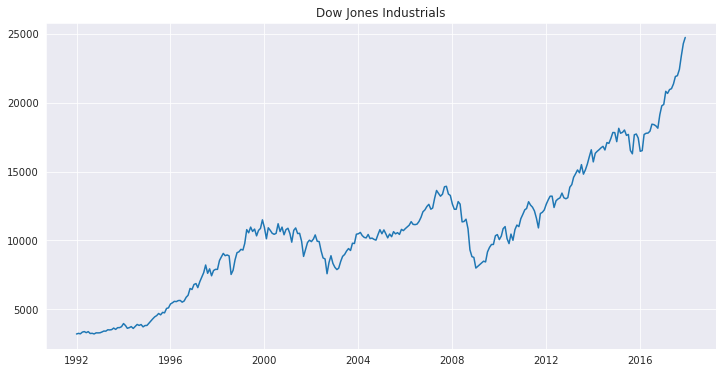

In [22]:
fig = plt.figure(figsize=(12,6))
plt.title('Dow Jones Industrials')
plt.plot(df['DATE'], df['CLOSE'])
plt.savefig("../data/DowJonesIndustrials.png")

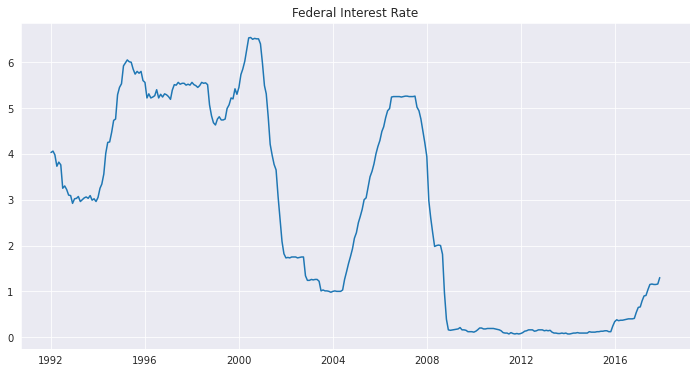

In [23]:
fig = plt.figure(figsize=(12,6))
plt.title('Federal Interest Rate')
plt.plot(df['DATE'], df['FED INTRST %'])
plt.savefig("../data/FederalInterestRate.png")

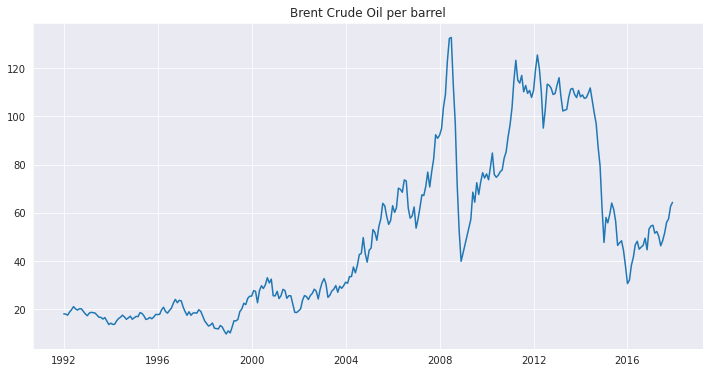

In [24]:
fig = plt.figure(figsize=(12,6))
plt.title('Brent Crude Oil per barrel')
plt.plot(df['DATE'], df['OIL PRICE'])
plt.savefig("../data/BrentCrudeOilperbarrel.png")

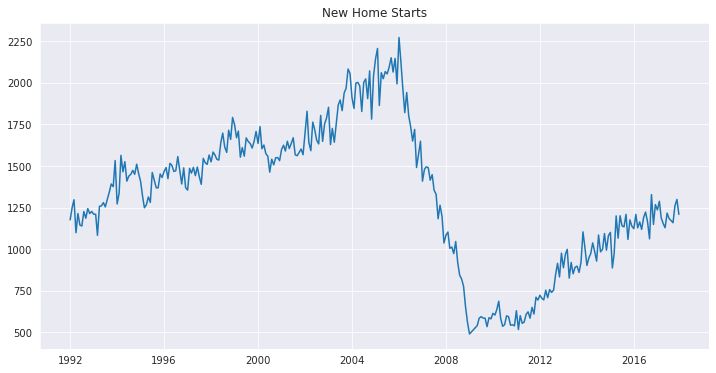

In [25]:
fig = plt.figure(figsize=(12,6))
plt.title('New Home Starts')
plt.plot(df['DATE'], df['NEW HOMES'])
plt.savefig("../data/NewHomeStarts.png")

- Below I have created a correclation matrix but it is important to note that this is a time series dataset and so the correlations may change with time.

<AxesSubplot:>

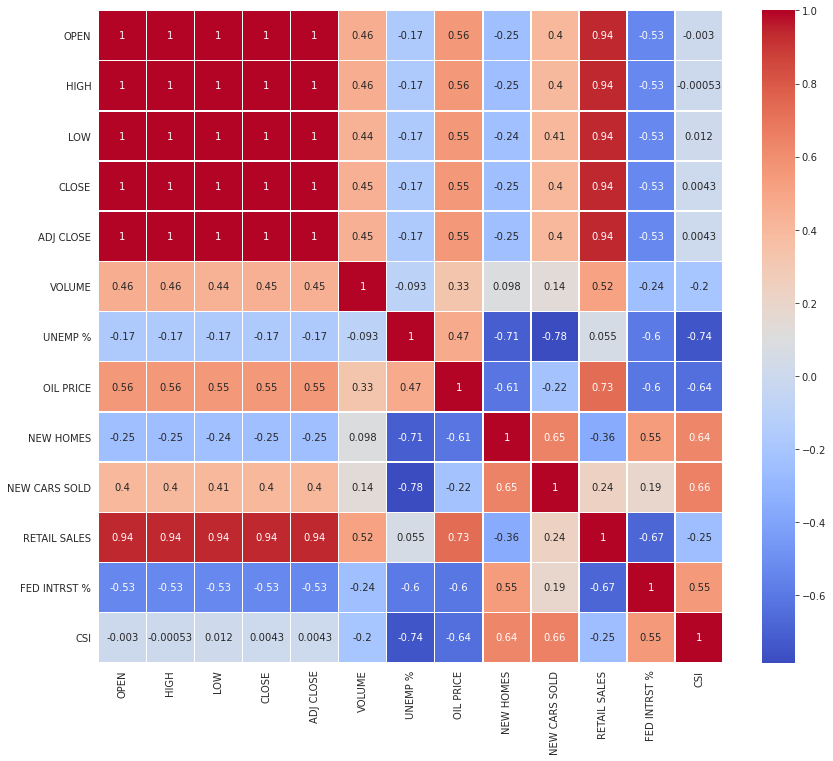

In [26]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=.5)

From the correlation matrix above the Open, High, Low, Close columns all supply the same information over time from the 1:1 correlation. I think it will be safe to drop all but Close which also happens to be the next day's Open. This is not always the case for high frequency data though.

We should also create a new column / feature from subtracting the LOW and HIGH column called SPREAD which is the difference between the two.
    
    

In [27]:
# create new column and drop the less useful columns

df_final = df.copy()
df_final['SPREAD'] = df_final.loc[:,'HIGH'] - df_final.loc[:,'LOW']

df_final.drop(['OPEN', 'HIGH','LOW', 'ADJ CLOSE'],axis=1,inplace=True)
df_final

,DATE,CLOSE,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI,SPREAD
84,1992-01-01,3223.399902,5.611600e+08,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5,159.879882
85,1992-02-01,3267.699951,4.111500e+08,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8,85.419922
86,1992-03-01,3235.500000,4.024100e+08,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0,111.359864
87,1992-04-01,3359.100098,4.583000e+08,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2,205.270020
88,1992-05-01,3396.899902,3.882400e+08,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2,116.649902
...,...,...,...,...,...,...,...,...,...,...,...
391,2017-08-01,21948.099609,6.150060e+09,4.4,51.70,1172.0,16.4,419882.0,1.16,96.8,578.769531
392,2017-09-01,22405.089844,6.342130e+09,4.2,56.15,1159.0,18.9,429623.0,1.15,95.1,709.878907
393,2017-10-01,23377.240234,7.302910e+09,4.1,57.51,1261.0,18.4,432584.0,1.15,100.7,1069.250000
394,2017-11-01,24272.349609,7.335640e+09,4.1,62.71,1299.0,17.9,436032.0,1.16,98.5,1085.070313


In [28]:
# move the SPREAD column next to CLOSE as they are related

cols = list(df_final)
cols.insert(2, cols.pop(cols.index('SPREAD')))
df_final = df_final.reindex(columns = cols)
df_final.head(20)

,DATE,CLOSE,SPREAD,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
84,1992-01-01,3223.399902,159.879882,561160000.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
85,1992-02-01,3267.699951,85.419922,411150000.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
86,1992-03-01,3235.500000,111.359864,402410000.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0
87,1992-04-01,3359.100098,205.270020,458300000.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
88,1992-05-01,3396.899902,116.649902,388240000.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2
89,1992-06-01,3318.500000,168.229980,475360000.0,7.8,21.16,1145.0,13.5,149821.0,3.76,80.4
90,1992-07-01,3393.800049,136.429932,449770000.0,7.7,20.24,1139.0,12.9,150809.0,3.25,76.6
91,1992-08-01,3257.399902,192.889892,363380000.0,7.6,19.74,1226.0,12.9,151064.0,3.30,76.1
92,1992-09-01,3271.699951,133.729980,436570000.0,7.6,20.27,1186.0,13.4,152595.0,3.22,75.6
93,1992-10-01,3226.300049,185.060059,530760000.0,7.3,20.26,1244.0,13.7,153577.0,3.10,73.3


In [29]:
# reset the index 

df_final.reset_index(inplace=True)
df_final.drop(['index'],axis=1, inplace=True)
df_final.head()


,DATE,CLOSE,SPREAD,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3223.399902,159.879882,561160000.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
1,1992-02-01,3267.699951,85.419922,411150000.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
2,1992-03-01,3235.500000,111.359864,402410000.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0
3,1992-04-01,3359.100098,205.270020,458300000.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
4,1992-05-01,3396.899902,116.649902,388240000.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2


<AxesSubplot:>

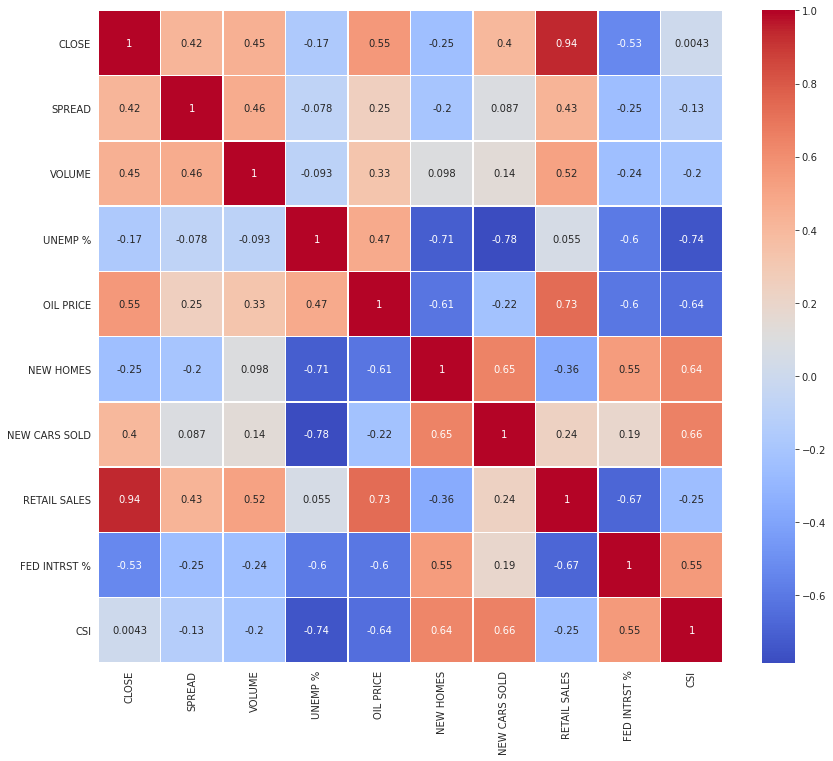

In [30]:
# view final dataframe correlation matrix

df_final_corr = df_final.corr()

fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(df_final_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=.5)

In [31]:
# save the final dataframe to CSV

df_final.to_csv('../data/cleaned_timeseries.csv', index=False)

In [32]:
test = pd.read_csv('../data/cleaned_timeseries.csv')
test.head()

,DATE,CLOSE,SPREAD,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3223.399902,159.879882,561160000.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
1,1992-02-01,3267.699951,85.419922,411150000.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
2,1992-03-01,3235.500000,111.359864,402410000.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0
3,1992-04-01,3359.100098,205.270020,458300000.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
4,1992-05-01,3396.899902,116.649902,388240000.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2


### Data cleaning conclusions
- Data cleaning comes in all shapes and sizes and there is no one template to handle all situations. 
- While we do not know how the data will perform for the task of predicting the CSI, we do know that the data supplied has been processed to facilitate fast adoption and testing in a ML enviroment. 
- Sure we could have engineered more features and processed the current ones some more but that would be to presumptuous on our part as to how the ML team would proceed. For example we could have normalized the features to a common scale but did not.
- In conclusion, like most tasks in the data science world, the best we can do is keep asking questions and experiment deeper based on those questions. 